In [1]:
import ffn
from empyrical import alpha_beta
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
import matplotlib as pyplot
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt

In [6]:
DIRECTORY = '/media/starscream/wheeljack/projects/'
PROJECT = 'stock-screener'

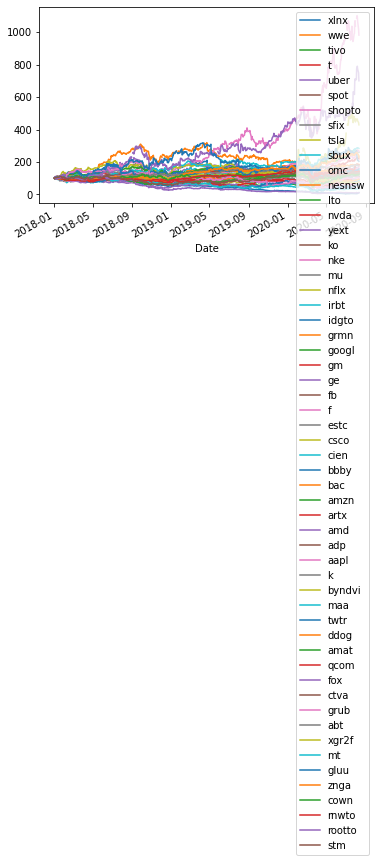

In [7]:
#'msft,aapl,amzn,fb,brk-b,jnj'
my_watchlist = pd.read_csv('{}/data/my_watchlist.csv'.format(os.path.join(DIRECTORY, PROJECT))).Symbol.unique()
prices = ffn.get(my_watchlist, common_dates = False, start='2018-01-01')
benchmark = ffn.get('spy', start='2018-01-01')
msft = ffn.get('tsla', start='2018-01-01')
ax = prices.rebase().plot()

In [8]:
prices.head()

,xlnx,wwe,tivo,t,uber,spot,shopto,sfix,tsla,sbux,...,grub,abt,xgr2f,mt,gluu,znga,cown,rnwto,rootto,stm
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.077721,30.768972,13.436927,32.630741,NaN,NaN,132.059998,24.770000,320.529999,54.424400,...,71.260002,56.094975,17.049528,33.589546,3.63,3.92,13.970474,11.088437,11.22,21.750267
2018-01-03,66.381584,30.142038,13.169968,31.877203,NaN,NaN,135.149994,24.629999,317.250000,55.444313,...,71.320000,56.219013,16.612606,34.407600,3.65,4.02,13.970474,10.997278,10.96,22.284315
2018-01-04,67.579971,30.249788,13.347939,32.173538,NaN,NaN,137.460007,25.360001,314.619995,55.652081,...,71.879997,56.123600,16.636353,34.062637,3.67,3.89,13.721889,10.997278,10.83,22.730968
2018-01-05,71.088882,30.416319,13.392433,32.292076,NaN,NaN,137.259995,25.770000,316.579987,56.294258,...,72.970001,56.285805,16.560360,34.033066,3.81,3.89,13.473304,10.955842,10.84,22.663002
2018-01-08,71.558655,30.661219,13.303447,32.385208,NaN,NaN,139.509995,26.469999,336.410004,56.010941,...,71.360001,56.123600,17.040031,34.693428,3.80,3.91,13.672173,10.988992,10.52,22.507643


In [27]:
from ffn.core import GroupStats
_ = prices.iloc[:, :3].fillna(0)
gs = GroupStats(_)
gs.stats

/home/starscream/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/starscream/anaconda3/lib/python3.7/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/home/starscream/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/starscream/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/starscream/anaconda3/lib/python3.7/site-packages/ffn/core.py:254: RuntimeWarning: invalid value encountered in double_scalars
  self.mtd = dp[-1] / mp[-2] - 1


,xlnx,wwe,tivo
start,2018-01-02 00:00:00,2018-01-02 00:00:00,2018-01-02 00:00:00
end,2020-08-11 00:00:00,2020-08-11 00:00:00,2020-08-11 00:00:00
rf,0,0,0
total_return,0.607463,0.475837,-1
cagr,0.199746,0.161059,-1
max_drawdown,-1,-1,-1
calmar,0.199746,0.161059,-1
mtd,-0.025524,-0.0257456,NaN
three_month,0.215406,0.024856,-1
six_month,0.163715,0.0686925,-1


In [ ]:
#Measures to Use
# Sharpe, Sortino, Ulcer PI, CAGR, 

In [29]:
ffn.core.to_ulcer_performance_index(prices)

xlnx      0.126179
wwe       0.082411
tivo     -0.055211
t         0.009267
uber     -0.009008
spot      0.132132
shopto    0.739942
sfix      0.043271
tsla      0.312862
sbux      0.169904
omc       0.005356
nesnsw    0.309711
lto       0.256122
nvda      0.167629
yext      0.070163
ko        0.070104
nke       0.361548
mu        0.062981
nflx      0.237970
irbt      0.033009
idgto    -0.111343
grmn      0.328686
googl     0.171691
gm       -0.011678
ge       -0.044711
fb        0.122784
f        -0.035193
estc      0.091392
csco      0.125648
cien      0.463714
bbby      0.006343
bac       0.043987
amzn      0.368114
artx     -0.007667
amd       0.486641
adp       0.152749
aapl      0.376366
k         0.059760
byndvi    0.122822
maa       0.136453
twtr      0.113759
ddog      0.508647
amat      0.082352
qcom      0.213176
fox      -0.080700
ctva      0.043153
grub      0.054593
abt       0.540777
xgr2f     0.009044
mt       -0.030022
gluu      0.182151
znga      0.474823
cown      0.

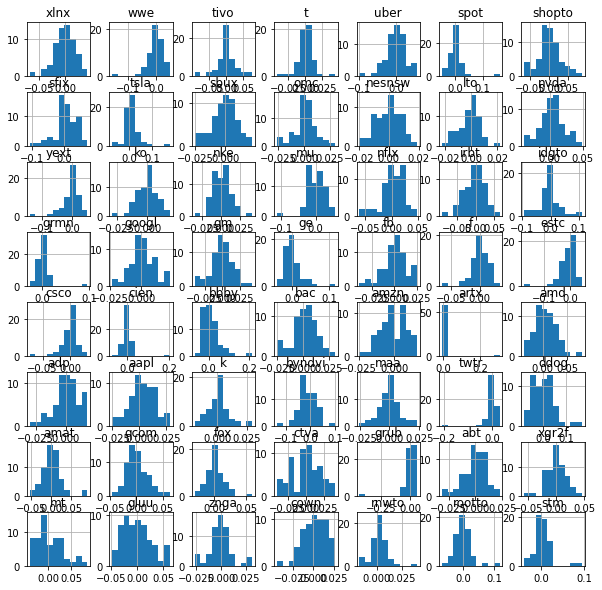

In [9]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10,10))

<module 'matplotlib.pyplot' from '/home/starscream/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

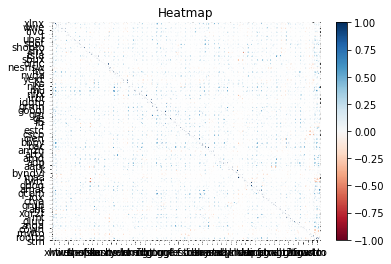

In [7]:
returns.plot_corr_heatmap()

In [8]:
returns.calc_mean_var_weights().as_format('.2%')

xlnx       0.00%
wwe        0.00%
tivo       0.00%
t          2.51%
uber       0.00%
spot       1.16%
shopto     0.00%
sfix       3.77%
tsla      14.48%
sbux       0.00%
omc        0.43%
nesnsw     0.00%
lto        0.00%
nvda       1.34%
yext       0.00%
ko         0.00%
nke        2.85%
mu         0.00%
nflx       0.00%
irbt       0.00%
idgto      0.00%
grmn       6.02%
googl      0.00%
gm         0.00%
ge         1.51%
fb         0.00%
f          0.00%
estc       0.00%
csco       0.00%
cien       0.00%
bbby      11.77%
bac        0.33%
amzn       0.00%
artx       7.66%
amd        8.26%
adp        0.00%
aapl       7.29%
k          6.07%
byndvi     0.00%
maa        0.00%
twtr       0.00%
ddog       0.00%
amat       0.00%
qcom       0.00%
fox        2.65%
ctva       0.00%
grub       0.00%
abt        0.00%
xgr2f      4.76%
mt         0.20%
gluu       0.00%
znga       0.00%
cown       0.00%
rnwto     12.93%
rootto     0.00%
stm        4.02%
dtype: object

In [37]:
#fundamental metrics
#beta, dividendRate, priceToBook, pegRatio

,xlnx,wwe,tivo,t,uber,spot,shopto,sfix,tsla,sbux,...,grub,abt,xgr2f,mt,gluu,znga,cown,rnwto,rootto,stm
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.077721,30.768972,13.436927,32.630741,NaN,NaN,132.059998,24.770000,320.529999,54.424400,...,71.260002,56.094975,17.049528,33.589546,3.63,3.92,13.970474,11.088437,11.22,21.750267
2018-01-03,66.381584,30.142038,13.169968,31.877203,NaN,NaN,135.149994,24.629999,317.250000,55.444313,...,71.320000,56.219013,16.612606,34.407600,3.65,4.02,13.970474,10.997278,10.96,22.284315
2018-01-04,67.579971,30.249788,13.347939,32.173538,NaN,NaN,137.460007,25.360001,314.619995,55.652081,...,71.879997,56.123600,16.636353,34.062637,3.67,3.89,13.721889,10.997278,10.83,22.730968
2018-01-05,71.088882,30.416319,13.392433,32.292076,NaN,NaN,137.259995,25.770000,316.579987,56.294258,...,72.970001,56.285805,16.560360,34.033066,3.81,3.89,13.473304,10.955842,10.84,22.663002
2018-01-08,71.558655,30.661219,13.303447,32.385208,NaN,NaN,139.509995,26.469999,336.410004,56.010941,...,71.360001,56.123600,17.040031,34.693428,3.80,3.91,13.672173,10.988992,10.52,22.507643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,107.349998,46.610001,NaN,29.580000,30.260000,257.820007,1369.780029,22.150000,1430.760010,76.115944,...,72.239998,100.639999,11.950000,10.970000,9.44,9.83,16.469999,15.600000,1.06,27.940001
2020-08-03,106.389999,44.169998,NaN,29.620001,31.190001,254.429993,NaN,22.570000,1485.000000,75.091515,...,73.550003,100.680000,11.770000,11.290000,9.80,10.14,16.980000,NaN,NaN,28.879999
2020-08-04,107.750000,44.310001,NaN,30.010000,32.680000,250.020004,1435.560059,22.770000,1487.000000,74.723518,...,72.989998,99.930000,11.930000,11.410000,9.78,10.19,16.809999,15.430000,1.24,29.040001


In [10]:
returns.calc_sharpe().sort_values(ascending=False)

rnwto     0.314191
aapl      0.303741
tsla      0.270923
amd       0.264000
bbby      0.248538
stm       0.228114
nvda      0.194655
bac       0.183745
nke       0.163203
grmn      0.160489
sfix      0.150471
fox       0.136950
k         0.132607
artx      0.130102
mt        0.127779
nflx      0.119871
ge        0.112518
amat      0.105431
spot      0.099590
adp       0.096530
cown      0.086007
t         0.084452
qcom      0.084307
googl     0.081648
shopto    0.063782
omc       0.054017
fb        0.038209
cien      0.038023
mu        0.028667
tivo      0.026266
f         0.022845
ctva      0.018952
ddog      0.010750
xgr2f    -0.002793
maa      -0.011883
gm       -0.018612
abt      -0.019630
ko       -0.020855
nesnsw   -0.022175
rootto   -0.022377
gluu     -0.024754
znga     -0.032831
grub     -0.034354
csco     -0.051391
xlnx     -0.054997
sbux     -0.069898
wwe      -0.071895
amzn     -0.076360
uber     -0.101702
idgto    -0.119354
irbt     -0.121347
lto      -0.129566
yext     -0.

In [36]:
# returns.calc_clusters(n=3)
# prices.xlnx.calc_perf_stats()
# returns.calc_sortino_ratio(rf=0.015, nperiods=252) #>2
# returns.calc_sharpe(rf=0.015, nperiods=252) #>2
# returns.tsla.calc_prob_mom(benchmark)
prices.calc_calmar_ratio() #>3 #higher the better, average cagr for 3 years/max drawdown

xlnx      0.438234
wwe       0.234640
tivo           NaN
t        -0.107446
uber           NaN
spot           NaN
shopto    4.192017
sfix     -0.052873
tsla      1.333664
sbux      0.319571
omc      -0.193241
nesnsw         NaN
lto       0.566599
nvda      0.672807
yext      0.264814
ko        0.133199
nke       0.517992
mu        0.080034
nflx      0.975339
irbt     -0.048784
idgto    -0.700046
grmn      0.712481
googl     0.451200
gm       -0.216144
ge       -0.452399
fb        0.367391
f        -0.251788
estc           NaN
csco      0.280912
cien      2.015477
bbby     -0.213831
bac      -0.082094
amzn      1.376359
artx           NaN
amd       2.481873
adp       0.220519
aapl      1.233005
k         0.146515
byndvi         NaN
maa       0.241847
twtr      0.340947
ddog           NaN
amat      0.171817
qcom      0.755207
fox            NaN
ctva           NaN
grub      0.025074
abt       0.816691
xgr2f    -0.174094
mt       -0.404822
gluu      0.566618
znga      1.875992
cown      0.

In [10]:
stats = prices.iloc[:, :].calc_stats()
# stats.display()

/home/starscream/anaconda3/lib/python3.7/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [11]:
_ = stats.stats.T
_.sort_values(by = 'calmar', ascending = False)

,start,end,rf,total_return,cagr,max_drawdown,calmar,mtd,three_month,six_month,...,yearly_skew,yearly_kurt,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
artx,2019-09-19,2019-12-20,0,0.313596,1.9533,-0.0100334,194.679,-0.0016667,0.325221,NaN,...,NaN,NaN,NaN,NaN,-0.00450415,5.41667,0.0101525,-0.0016667,NaN,NaN
tsla,2019-09-19,2019-12-20,0,0.644728,6.2097,-0.09485,65.4687,0.229284,0.685604,NaN,...,NaN,NaN,NaN,NaN,-0.0355916,8.25,0.194802,NaN,NaN,NaN
aapl,2019-09-19,2019-12-20,0,0.26846,1.57051,-0.0313245,50.1369,0.0456127,0.287278,NaN,...,NaN,NaN,NaN,NaN,-0.0123517,3.07143,0.0779504,NaN,NaN,NaN
stm,2019-09-19,2019-12-20,0,0.357492,2.36498,-0.0478402,49.4349,0.104599,0.396218,NaN,...,NaN,NaN,NaN,NaN,-0.0181542,5.18182,0.117271,NaN,NaN,NaN
bbby,2019-09-19,2019-12-20,0,0.690149,7.03318,-0.155405,45.257,0.158065,0.719409,NaN,...,NaN,NaN,NaN,NaN,-0.0573248,9,0.169964,NaN,NaN,NaN
amd,2019-09-19,2019-12-20,0,0.457577,3.46308,-0.0786553,44.0285,0.127714,0.469218,NaN,...,NaN,NaN,NaN,NaN,-0.0276963,6.88889,0.150655,NaN,NaN,NaN
rnwto,2019-09-19,2019-12-20,0,0.195799,1.03382,-0.0263976,39.1632,0.0466431,0.193108,NaN,...,NaN,NaN,NaN,NaN,-0.00705878,3.21429,0.0528196,NaN,NaN,NaN
nvda,2019-09-19,2019-12-20,0,0.35383,2.32907,-0.0605613,38.4581,0.104411,0.387148,NaN,...,NaN,NaN,NaN,NaN,-0.0298548,7.55556,0.112743,NaN,NaN,NaN
grmn,2019-09-19,2019-12-20,0,0.161055,0.809144,-0.0324858,24.9077,0.0160571,0.167337,NaN,...,NaN,NaN,NaN,NaN,-0.0152371,8.33333,0.0550207,NaN,NaN,NaN
sfix,2019-09-19,2019-12-20,0,0.36144,2.40399,-0.122218,19.6697,0.122986,0.348269,NaN,...,NaN,NaN,NaN,NaN,-0.0556416,7.44444,0.114005,NaN,NaN,NaN


In [12]:
alpha, beta = alpha_beta(msft, benchmark)
print(beta)

6.806699970450943


/home/starscream/anaconda3/lib/python3.7/site-packages/empyrical/stats.py:1294: RuntimeWarning: overflow encountered in power
  out=out


In [16]:
# portfolio weights
weights = np.asarray([0.4,0.2,0.1,0.1,0.1,0.1])

returns = prices.pct_change().iloc[:, :len(weights)]
 
# mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()[:len(weights)]
print(len(mean_daily_returns), len(weights), len(cov_matrix))
 
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print("Expected annualised return: " + str(portfolio_return))
print("Volatility: " + str(portfolio_std_dev))

6 6 6
Expected annualised return: 0.19
Volatility: 0.32


In [17]:
# Expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Optimise portfolio for maximum Sharpe Ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'xlnx': 0.0, 'wwe': 0.0, 'tivo': 0.0, 't': 0.0, 'uber': 0.0, 'spot': 0.0, 'shopto': 0.33207, 'sfix': 0.0, 'tsla': 0.06613, 'sbux': 0.0, 'omc': 0.0, 'nesnsw': 0.0, 'lto': 0.0, 'nvda': 0.0, 'yext': 0.0, 'ko': 0.0, 'nke': 0.0, 'mu': 0.0, 'nflx': 0.0, 'irbt': 0.0, 'idgto': 0.0, 'grmn': 0.0, 'googl': 0.0, 'gm': 0.0, 'ge': 0.0, 'fb': 0.0, 'f': 0.0, 'estc': 0.0, 'csco': 0.0, 'cien': 0.03834, 'bbby': 0.0, 'bac': 0.0, 'amzn': 0.0, 'artx': 0.0, 'amd': 0.25932, 'adp': 0.0, 'aapl': 0.0, 'k': 0.0, 'byndvi': 0.07412, 'maa': 0.0, 'twtr': 0.0, 'ddog': 0.23003, 'amat': 0.0, 'qcom': 0.0, 'fox': 0.0, 'ctva': 0.0, 'grub': 0.0, 'abt': 0.0, 'xgr2f': 0.0, 'mt': 0.0, 'gluu': 0.0, 'znga': 0.0, 'cown': 0.0, 'rnwto': 0.0, 'rootto': 0.0, 'stm': 0.0}
Expected annual return: 101.4%
Annual volatility: 44.4%
Sharpe Ratio: 2.24


(1.0144351851540994, 0.4443637276413721, 2.237885595281232)

In [33]:
latest_prices = discrete_allocation.get_latest_prices(prices)
allocation, leftover = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=1000).lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

50 out of 56 tickers were removed
{'shopto': 0, 'tsla': 0, 'cien': 1, 'amd': 3, 'byndvi': 1, 'ddog': 3}
Funds remaining: $296.07


In [32]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.efficient_return(target_return=0.2, market_neutral=True)

{'xlnx': -0.7907600173353778,
 'wwe': 0.3059772317203985,
 'tivo': -0.21462703311820083,
 't': -0.3501110563576733,
 'uber': -1.0,
 'spot': -0.35902387679324393,
 'shopto': 0.8664906637203444,
 'sfix': 0.26197112229586916,
 'tsla': 0.5625243309511389,
 'sbux': 1.0,
 'omc': -0.18064993280912575,
 'nesnsw': 1.0,
 'lto': -0.37613908153739745,
 'nvda': 0.27659110111043217,
 'yext': 0.412735015950037,
 'ko': -0.4357329705023998,
 'nke': -0.03159738844096385,
 'mu': 0.02730227491123345,
 'nflx': -0.2714468393498878,
 'irbt': -0.14921583532891036,
 'idgto': 0.24051195899246441,
 'grmn': 0.169886031122002,
 'googl': -0.4426543405637413,
 'gm': 0.7551243766289306,
 'ge': 0.3376964002885504,
 'fb': 0.16694731883045702,
 'f': -0.5163526822833827,
 'estc': -0.5887126234789942,
 'csco': -0.4140623972401609,
 'cien': 0.5347637557277691,
 'bbby': 0.05290340951758209,
 'bac': 0.5728698319804001,
 'amzn': -0.594290822368251,
 'artx': -0.5107593187899598,
 'amd': -0.18012913316273751,
 'adp': 0.38666064